In [44]:
!pip install numpy
!pip install matplotlib
!brew install cmake
!pip install cvxpy


[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: pip install --upgrade pip
To reinstall 3.27.1, run:
  brew reinstall cmake

[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: pip install --upgrade pip


In [45]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy
import pdb
import numpy.linalg as LA

# Problem 1

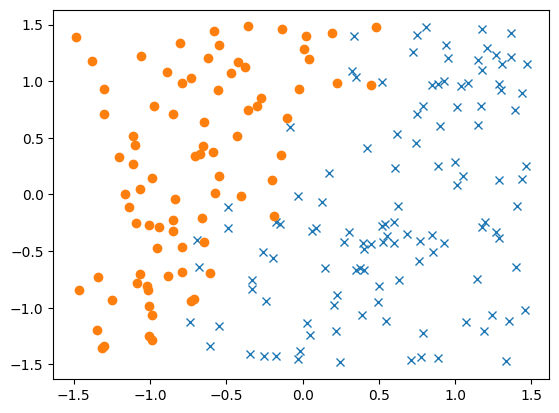

In [46]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1
plt.plot(np.extract(y_d4>0,x_d4[:,0]),np.extract(y_d4>0,x_d4[:,1]), 'x')
plt.plot(np.extract(y_d4<0,x_d4[:,0]),np.extract(y_d4<0,x_d4[:,1]), 'o')

In [47]:
# objective function
def J(x: np.ndarray, y: np.ndarray, w: np.ndarray, penalty_weight: float):
    loss = penalty_weight * w.T @ w
    for xi, yi in zip(x, y):
        loss += np.log(1 + np.exp(-yi*w.T@xi))
    return loss

def dJ(x: np.ndarray, y: np.ndarray, w: np.ndarray, penalty_weight: float):
    grad = 2 * penalty_weight * w
    for xi, yi in zip(x, y):
        grad += -yi * np.exp(-yi*w.T@xi) * xi / (1 + np.exp(-yi*w.T@xi))
    return grad

def HJ(x: np.ndarray, y: np.ndarray, w: np.ndarray, penalty_weight: float):
    H = 2 * penalty_weight * np.identity(len(x[0]))
    for xi, yi in zip(x, y):
        H += yi**2 * np.exp(-yi*w.T@xi) * xi@xi.T / (1 + np.exp(-yi*w.T@xi))**2
    return H

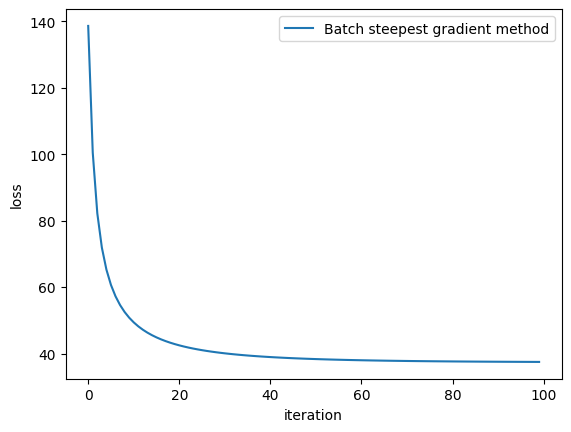

In [112]:
# implement batch steepest gradient method here
# パラメータ
eta = 0.01
max_iter = 100
# w = np.random.rand(200)
w = np.zeros(4)
penalty_weight = 0.1

# データ準備
w_hist_batch = np.zeros((max_iter, 4))
loss_hist_batch = np.zeros(max_iter) # to store the history of loss J(w_t)
x = x_d4
y = y_d4

for i in range(max_iter):
    w_hist_batch[i] = w
    loss_hist_batch[i] = J(x, y, w, penalty_weight)
    w += - eta * dJ(x, y, w, penalty_weight)

# plot the result
fig, ax = plt.subplots()
ax.plot(loss_hist_batch, label='Batch steepest gradient method')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()
fig.savefig('data/1-2-steepest.png')

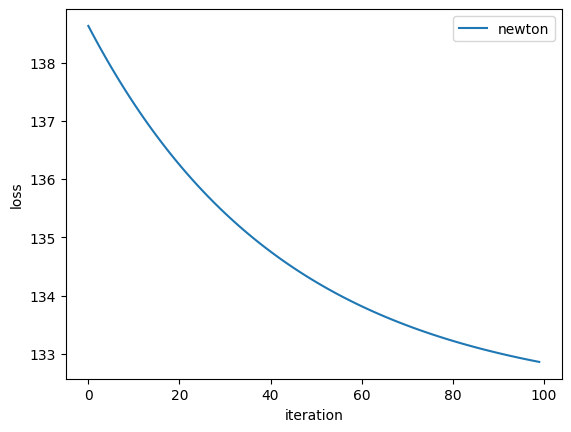

In [113]:
# implement Newton based method here
# パラメータ
eta = 0.01
max_iter = 100
# w = np.random.rand(4)
w = np.zeros(4)
penalty_weight = 0.01

# データ準備
w_hist_newton = np.zeros((max_iter, 4))
loss_hist_newton = np.zeros(max_iter) # to store the history of loss J(w_t)
x = x_d4
y = y_d4

for i in range(max_iter):
    w_hist_newton[i] = w
    loss_hist_newton[i] = J(x, y, w, penalty_weight)
    w += - eta * HJ(x, y, w, penalty_weight)**-1 @ dJ(x, y, w, penalty_weight)
    
# plot the result
fig, ax = plt.subplots()
ax.plot(loss_hist_newton, label='newton')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()
fig.savefig('data/1-2-newton.png')

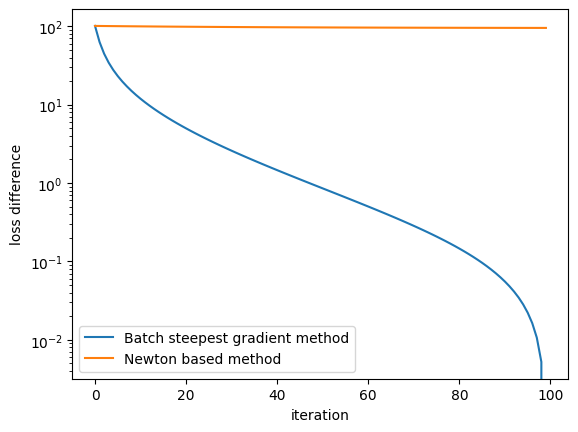

In [114]:
# plot the result
loss_dif_hist_batch = loss_hist_batch - loss_hist_batch[-1]
loss_dif_hist_newton = loss_hist_newton - loss_hist_batch[-1]
fig, ax = plt.subplots()
ax.plot(loss_dif_hist_batch, label='Batch steepest gradient method')
ax.plot(loss_dif_hist_newton, label='Newton based method')
ax.set_xlabel('iteration')
ax.set_ylabel('loss difference')
ax.set_yscale('log')
ax.legend()
fig.savefig('data/1-2-compare.png')

# Problem 2

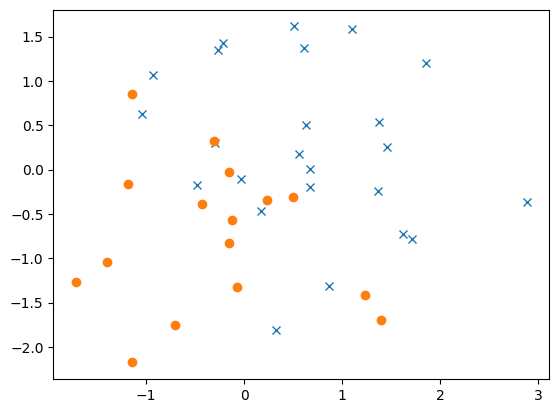

In [51]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# prepare dataset
np.random.seed(3846)
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x_pro2 = np.random.randn(n, 2) + 0
y_pro2 = 2 * (omega * x_pro2[:,0] + x_pro2[:,1] + noise > 0) - 1

plt.plot(np.extract(y_pro2>0,x_pro2[:,0]),np.extract(y_pro2>0,x_pro2[:,1]), 'x')
plt.plot(np.extract(y_pro2<0,x_pro2[:,0]),np.extract(y_pro2<0,x_pro2[:,1]), 'o')

In [52]:
# (1)
# condition
A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])

In [53]:
def f(w: np.ndarray, mu: np.ndarray, A:np.ndarray, lam: float):
    return 1/2 * (w-mu).T@A@(w-mu) + lam * w.sum()

def df(w: np.ndarray, mu:np.ndarray, A:np.ndarray):
    '''
    2次形式部分の微分
    '''
    return 1/2 * (A + A.T)@(w - mu)

def prox(y: float, eta: float, lam: float):
    if(y>eta*lam):
        return y - eta * lam
    elif((-eta*lam <= y) and (y <= eta*lam)):
        return 0
    else:
        return y + eta * lam

/var/folders/p1/xvkx0rdn0p9_8l0p22r9ykqm0000gp/T/ipykernel_51004/3997095275.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obj_hist[int(lam)][i] = f(w, mu, A, lam)
/var/folders/p1/xvkx0rdn0p9_8l0p22r9ykqm0000gp/T/ipykernel_51004/3997095275.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/p1/xvkx0rdn0p9_8l0p22r9ykqm0000gp/T/ipykernel_51004/3997095275.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


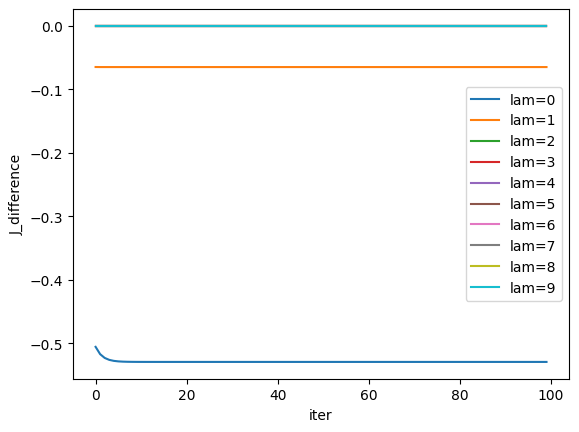

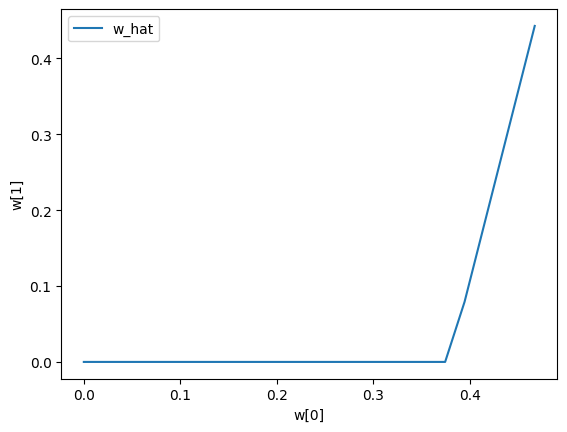

In [116]:
max_iter = 100
lams = np.arange(0, 10.1, 0.1)
obj_hist = np.zeros((11, max_iter))
w_hat_lam = np.zeros((len(lams), 2, 1))
w: np.ndarray = np.zeros((len(mu), 1))

prox_vec_func = np.vectorize(prox)

eigs, _ = LA.eig(A)
eta = np.max(eigs)**-1


for lam_idx, lam in enumerate(lams):
  # init
  w: np.ndarray = np.zeros((len(mu), 1))
  
  ### implement PG ###
  for i in range(max_iter):
    y: np.ndarray = w - eta * df(w, mu, A)
    w = prox_vec_func(y, eta, lam)
    if lam.is_integer():
      obj_hist[int(lam)][i] = f(w, mu, A, lam)
    
  # w_hat log
  w_hat_lam[lam_idx] = w
  
fig, ax = plt.subplots()
for i in range(10):
  ax.plot(obj_hist[i] - obj_hist[-1], label=f'lam={i}')
ax.set_xlabel('iter')
ax.set_ylabel('J_difference')
# ax.set_yscale('log')
ax.legend()
fig.show()
fig.savefig('data/2-1-J_difference.png')

fig, ax = plt.subplots()
ax.plot(w_hat_lam[:,0], w_hat_lam[:,1], label='w_hat')
ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
ax.legend()
fig.show()
fig.savefig('data/2-1-w_hat.png')

# plt.plot(lams, w_hat_lam)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/p1/xvkx0rdn0p9_8l0p22r9ykqm0000gp/T/ipykernel_51004/3791645746.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


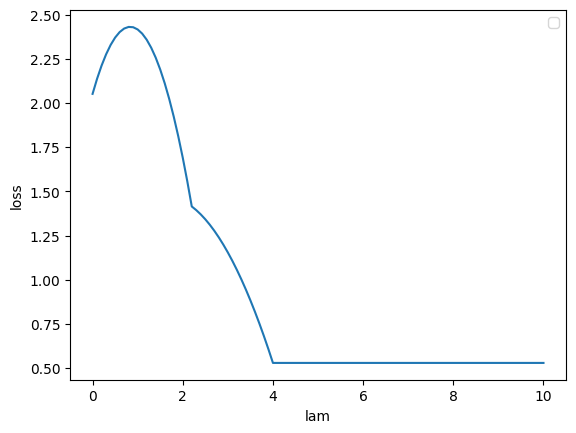

In [115]:
fig, ax = plt.subplots()
ax.plot(lams, [f(w, mu, A, lam)[0][0] for w, lam in zip(w_hat_lam, lams)])
ax.set_xlabel('lam')
ax.set_ylabel('loss')
# ax.set_yscale('log')
ax.legend()
fig.show()

In [56]:
# (2)
# condition
A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.zeros((len(x_pro2[0]),1))
for mu_idx in range(len(mu)):
    xiyi_sum = x_pro2[:, mu_idx]@y_pro2
    xi_2_sum = x_pro2[:, mu_idx]@x_pro2[:, mu_idx]
    mu[mu_idx] = xiyi_sum/xi_2_sum
mu

array([[0.46736587],
       [0.44284026]])

/var/folders/p1/xvkx0rdn0p9_8l0p22r9ykqm0000gp/T/ipykernel_51004/723553729.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pg_obj_hist[i] = f(w, mu, A, lam)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/p1/xvkx0rdn0p9_8l0p22r9ykqm0000gp/T/ipykernel_51004/723553729.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


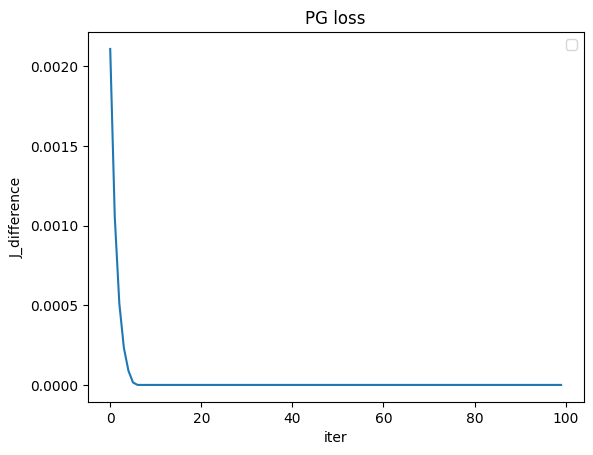

In [109]:
max_iter = 100
lam = 0.5
pg_obj_hist = np.zeros(max_iter)
w: np.ndarray = np.zeros((len(mu), 1))

prox_vec_func = np.vectorize(prox)

eigs, _ = LA.eig(A)
eta = np.max(eigs)**-1


# init
w: np.ndarray = np.zeros((len(mu), 1))

### implement PG ###
for i in range(max_iter):
  y: np.ndarray = w - eta * df(w, mu, A)
  w = prox_vec_func(y, eta, lam)
  # log
  pg_obj_hist[i] = f(w, mu, A, lam)

  
fig, ax = plt.subplots()
ax.plot(pg_obj_hist - pg_obj_hist[-1])
ax.set_xlabel('iter')
ax.set_ylabel('J_difference')
ax.set_title('PG loss')
ax.legend()
fig.show()
fig.savefig('data/2-2-PG_J_difference.png')

/var/folders/p1/xvkx0rdn0p9_8l0p22r9ykqm0000gp/T/ipykernel_51004/3782435402.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  adagrad_obj_hist[i] = f(w, mu, A, lam)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/p1/xvkx0rdn0p9_8l0p22r9ykqm0000gp/T/ipykernel_51004/3782435402.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


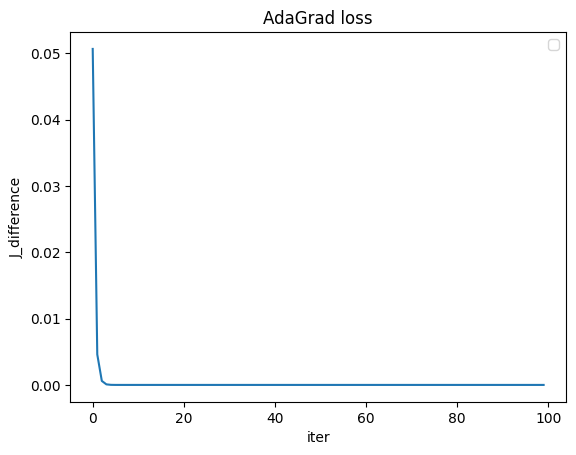

In [108]:
max_iter = 100
lam = 0.5
adagrad_obj_hist = np.zeros(max_iter)
w: np.ndarray = np.zeros((len(mu), 1))
h = np.zeros((len(mu), 1))

prox_vec_func = np.vectorize(prox)

eigs, _ = LA.eig(A)
eta = np.max(eigs)**-1


# init
w: np.ndarray = np.zeros((len(mu), 1))

### implement AdaGrad ###
for i in range(max_iter):
  h += (df(w, mu, A) + lam)*(df(w, mu, A) + lam)
  w -= eta * (df(w, mu, A) + lam) / (np.sqrt(h) + 1e-7)
  # log
  adagrad_obj_hist[i] = f(w, mu, A, lam)

  
fig, ax = plt.subplots()
ax.plot(adagrad_obj_hist - adagrad_obj_hist[-1])
ax.set_xlabel('iter')
ax.set_ylabel('J_difference')
ax.legend()
ax.set_title('AdaGrad loss')
fig.show()
fig.savefig('data/2-2-PG_J_difference.png')

/var/folders/p1/xvkx0rdn0p9_8l0p22r9ykqm0000gp/T/ipykernel_51004/3751315559.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


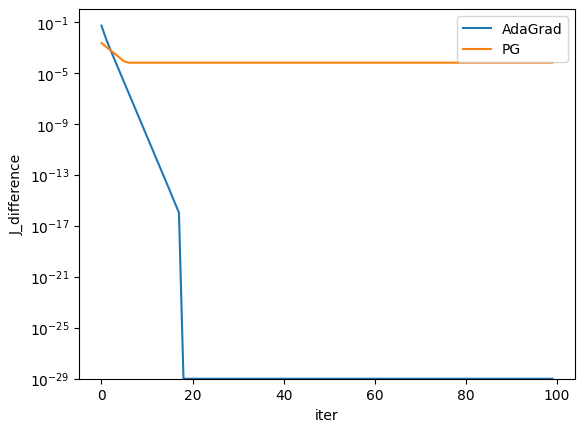

In [107]:
fig, ax = plt.subplots()
ax.plot(adagrad_obj_hist - adagrad_obj_hist[-1] + 10e-30, label='AdaGrad')
ax.plot(pg_obj_hist - adagrad_obj_hist[-1] + 10e-30, label='PG')
ax.set_xlabel('iter')
ax.set_ylabel('J_difference')
ax.set_yscale('log')
ax.set_ylim(10e-30, 10e-1)
ax.legend()
fig.show()
fig.savefig('data/2-2-PG_J_difference.png')

In [103]:
adagrad_obj_hist[-1] < pg_obj_hist[-1]

True